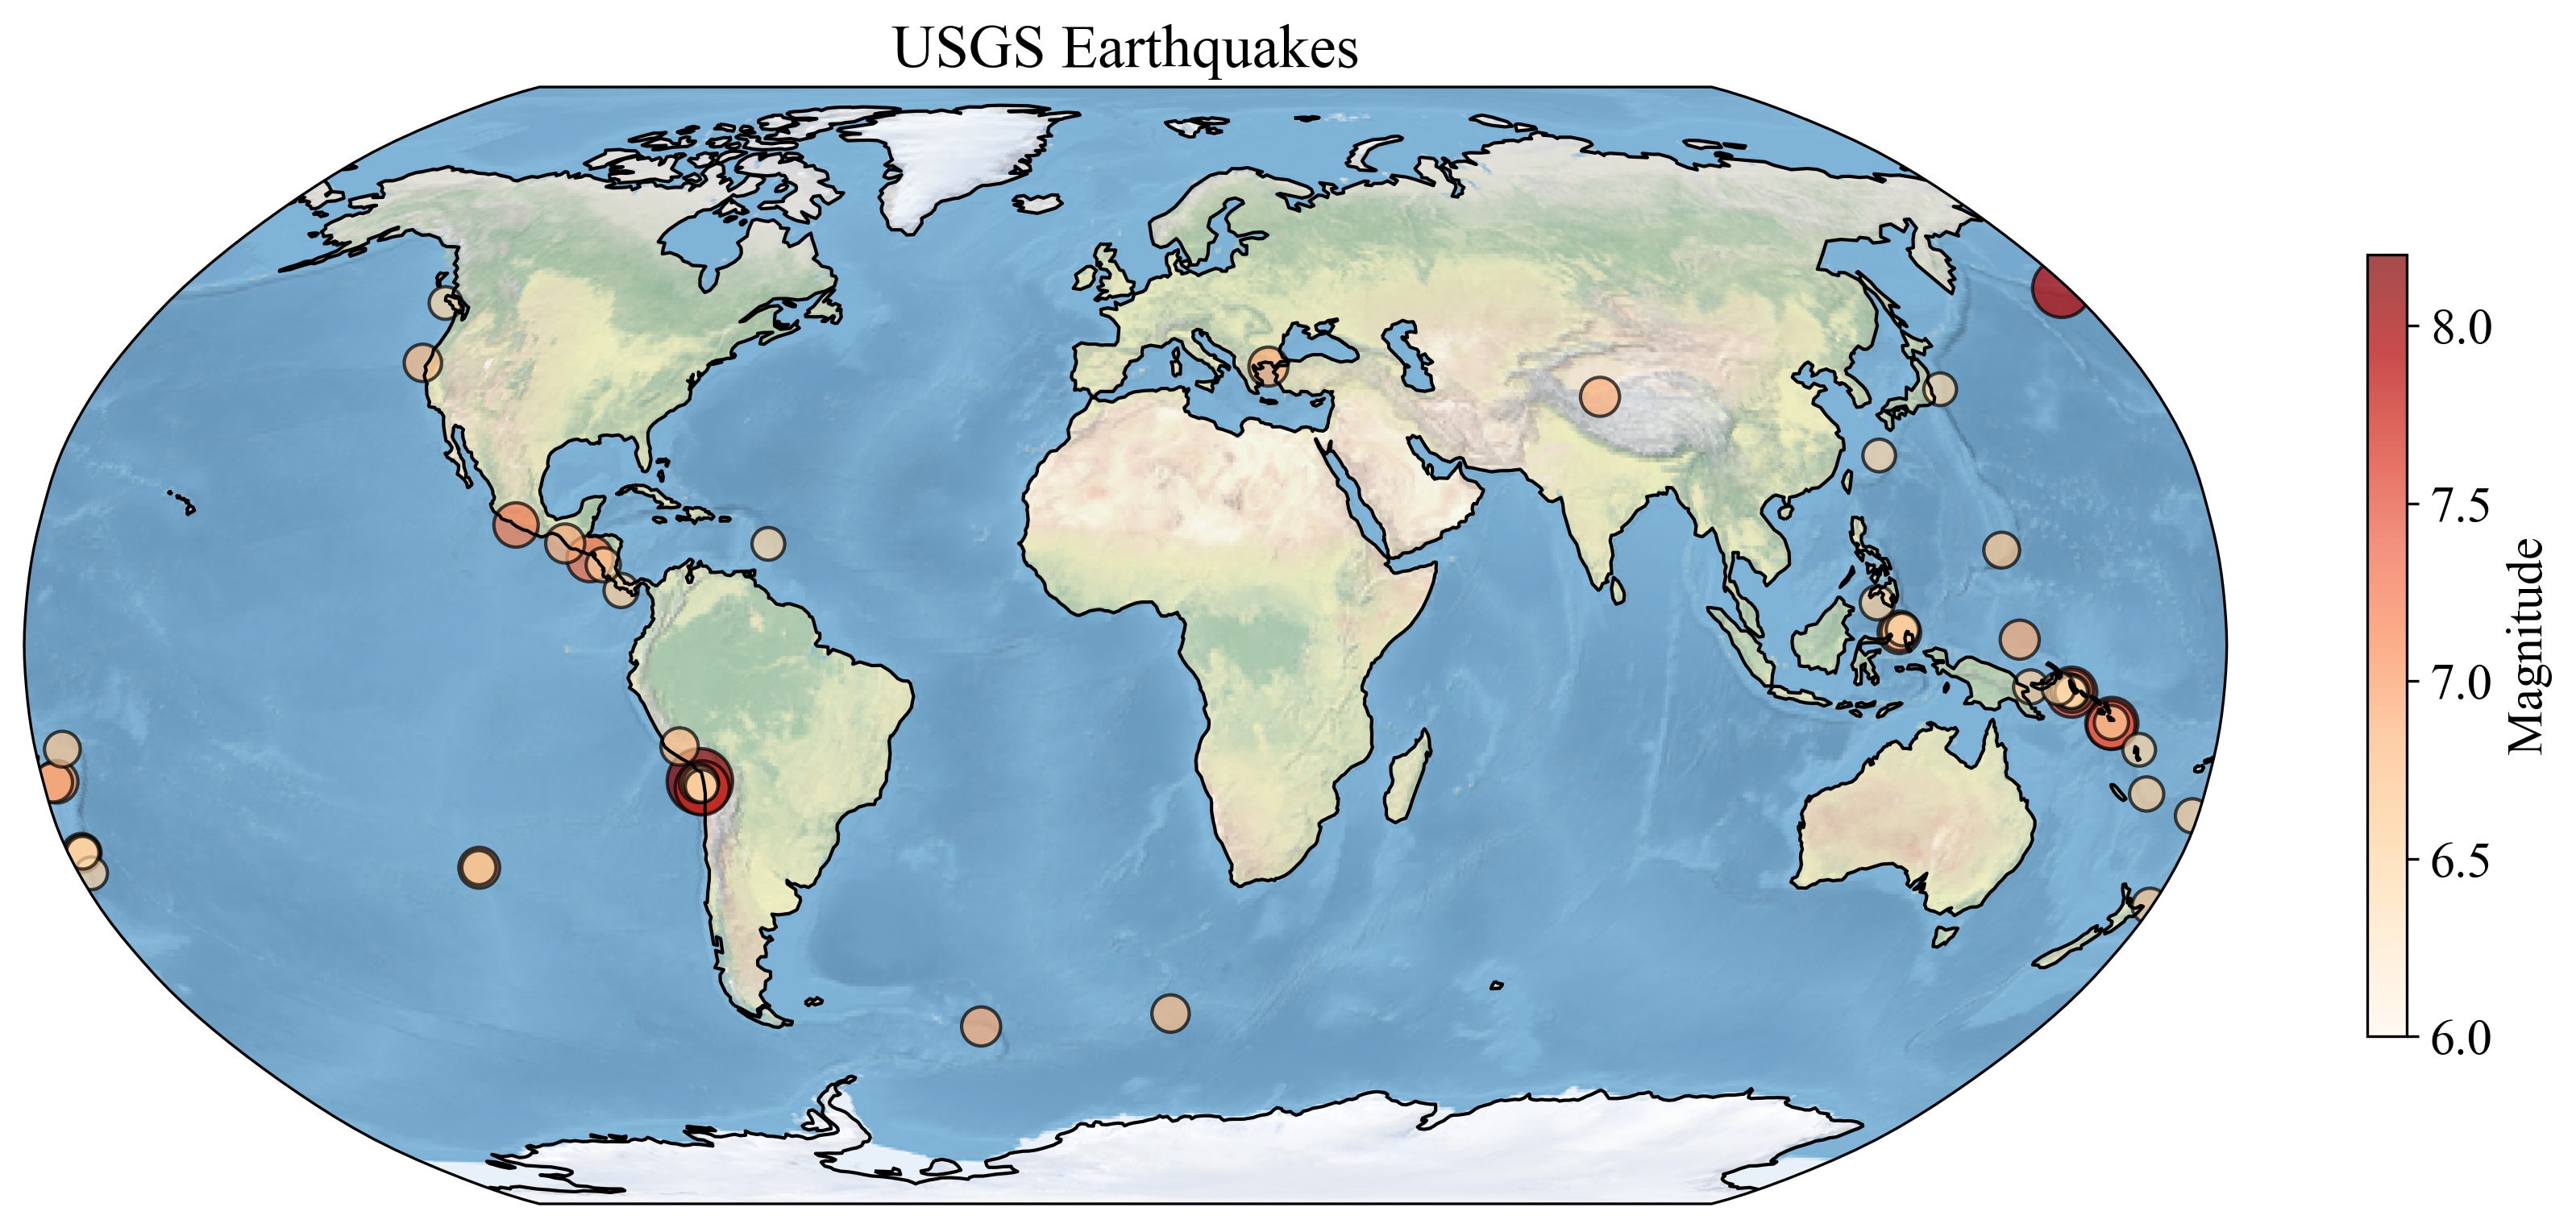

In [21]:

import pandas as pd  # 导入pandas库
import numpy as np  # 导入numpy库
import matplotlib.pyplot as plt  # 导入matplotlib库
import cartopy.crs as ccrs  # 导入cartopy库

data = pd.read_csv('data/usgs_earthquakes.csv', header=0, sep=',')  # 读取地震数据文件
data = data.sort_values(by='mag', ascending=False).head(50) # 筛选出震级大于等于0的数据
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 设置字体为Times New Roman
plt.rcParams['font.size'] = 15  # 设置字体大小为15

fig = plt.figure(figsize=(15, 6), dpi=300)  # 创建画布

s1 = pow(data['mag'], 6) / 800  # 计算散点大小

ax = plt.axes(projection=ccrs.Robinson())  # 创建地图投影
ax.set_global()  # 设置地图范围为全球
ax.coastlines(resolution='110m')  # 绘制海岸线

ax.stock_img()  # 绘制地图背景
sc = ax.scatter(data['longitude'], data['latitude'], c=data['mag'], cmap='OrRd',vmin=6, s=s1, alpha=0.7,edgecolors='black',
                transform=ccrs.PlateCarree())  # 绘制散点图

cbar = fig.colorbar(sc, ax=ax, shrink=0.7, label='Magnitude') # 添加颜色条

# ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())  # 设置地图范围
ax.set_title('USGS Earthquakes')  # 设置标题

plt.savefig('earthquakes.png')  # 保存图像
plt.show()  # 显示图像




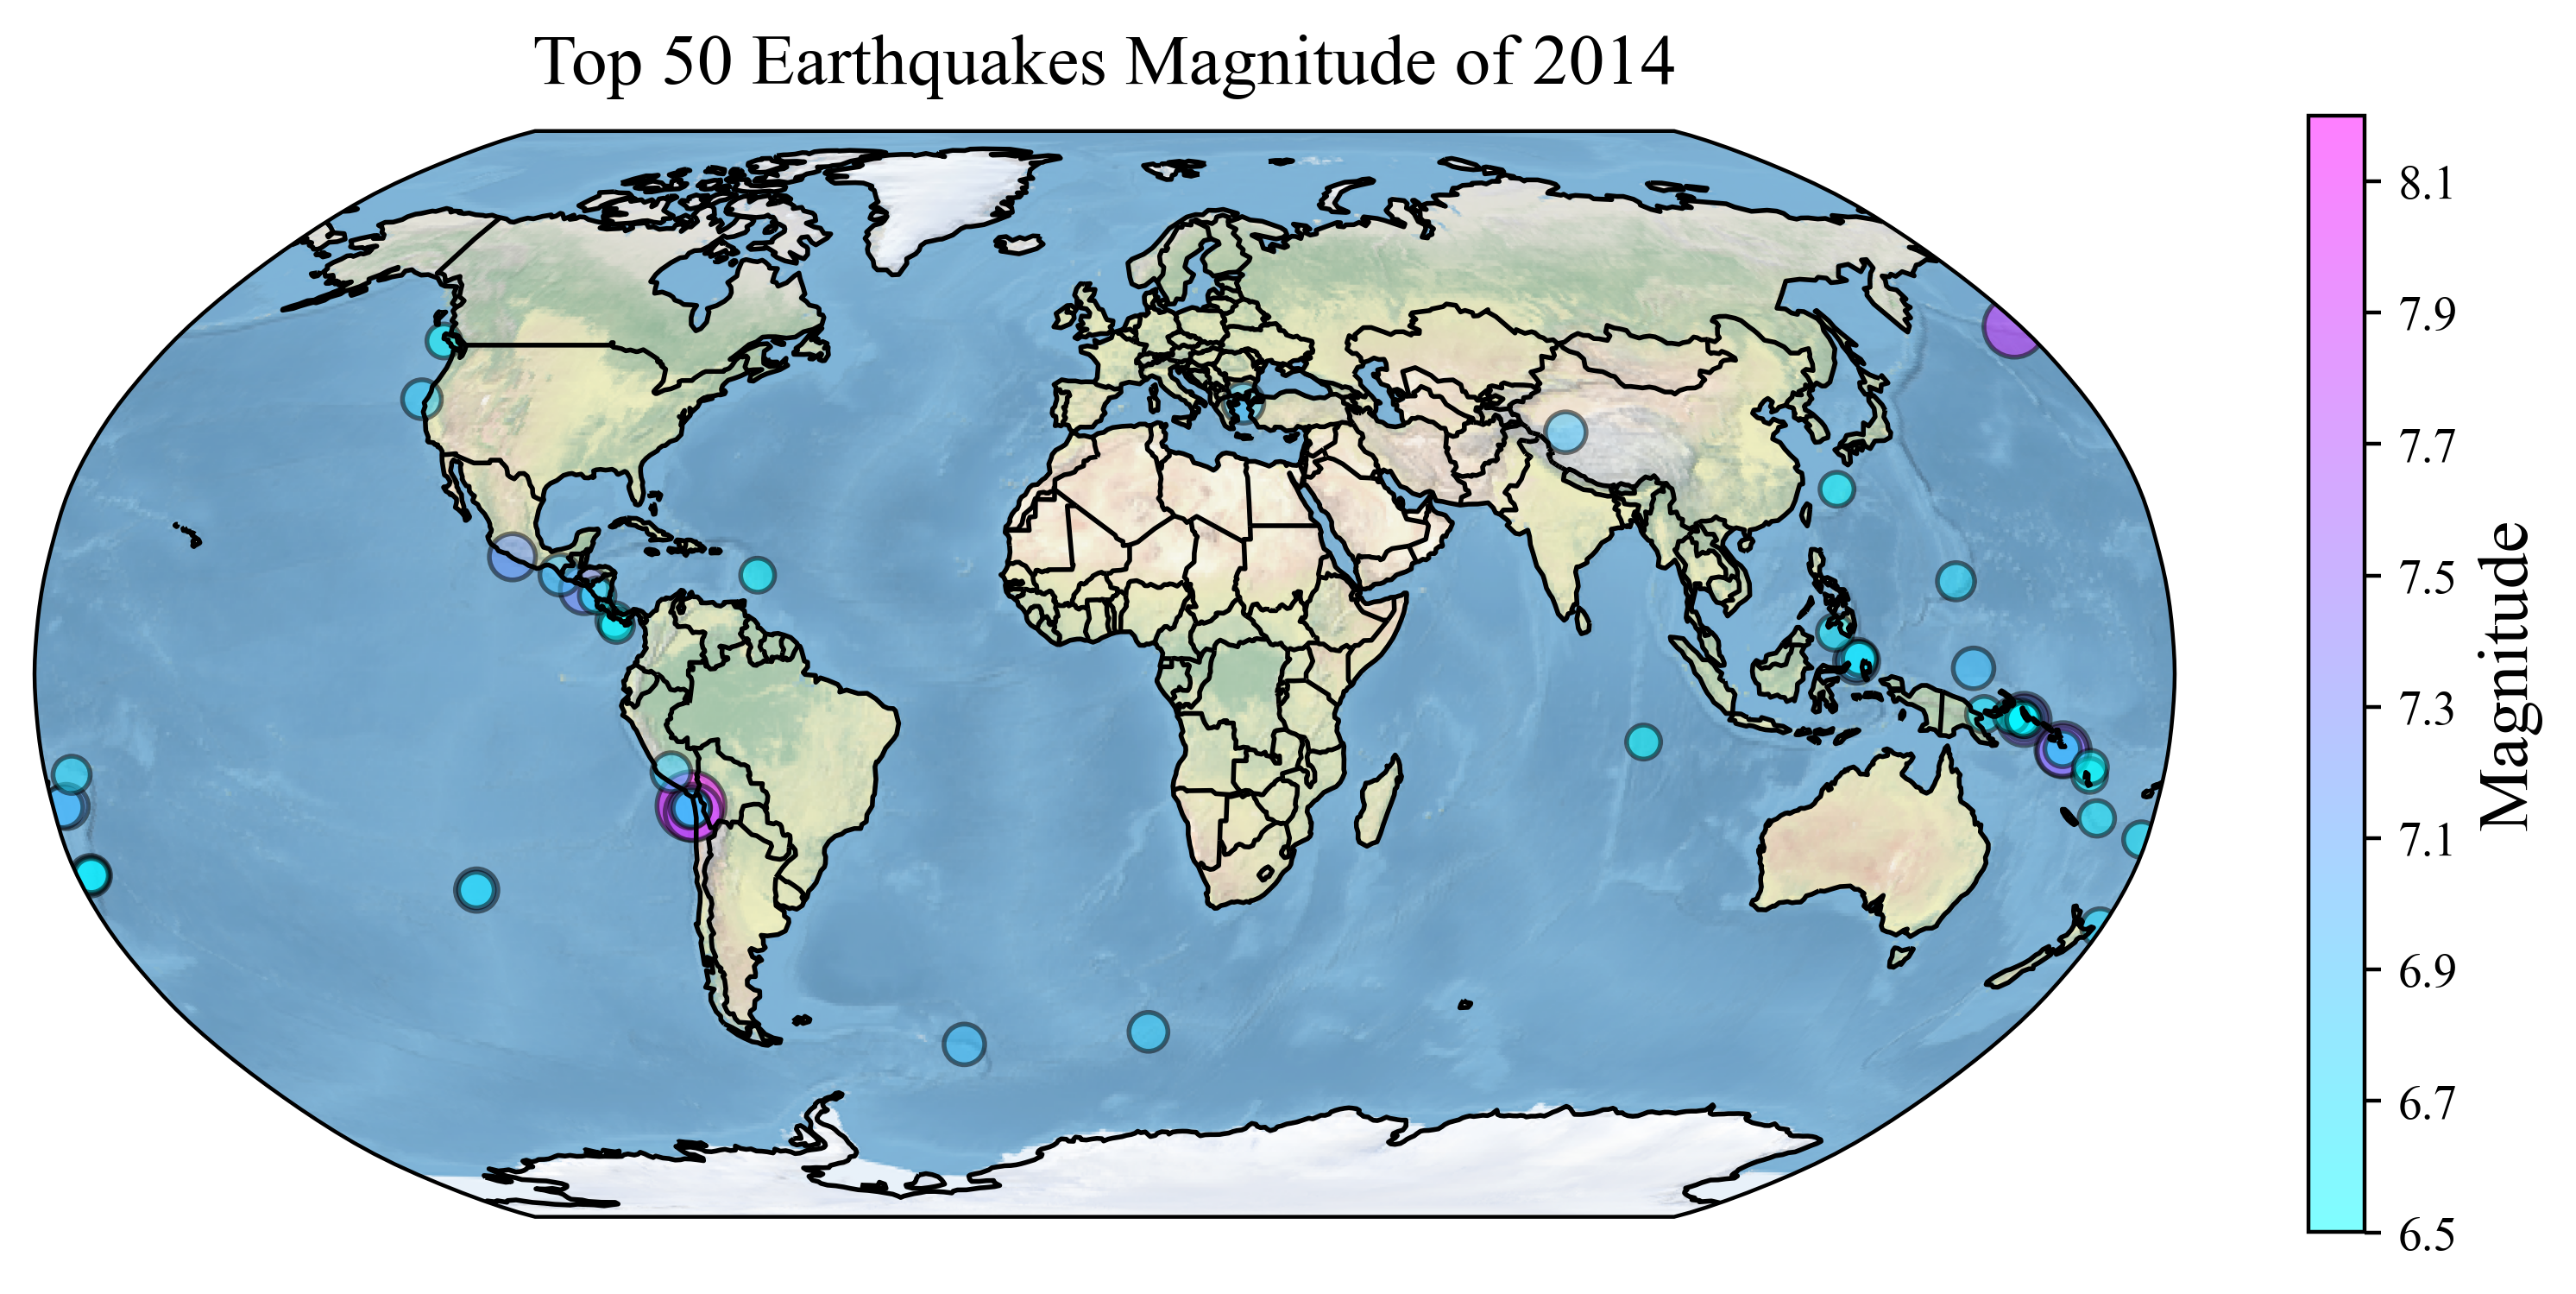

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read the CSV file
earthquake = pd.read_csv('data/usgs_earthquakes.csv')

# Filter earthquakes with magnitude greater than 0
earthquake = earthquake[earthquake['mag'] > 0].sort_values(by='mag', ascending=False).head(50)

# Create a map
fig = plt.figure(figsize=(10, 6), dpi=400)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.stock_img()

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Plot the earthquakes
sc = ax.scatter(earthquake['longitude'], earthquake['latitude'], s=pow(earthquake['mag'],6)/1500, c=earthquake['mag'], cmap='cool', alpha=0.5, transform=ccrs.PlateCarree(),edgecolor='black')

# Set the title
ax.set_title('Top 50 Earthquakes Magnitude of 2014', fontsize=15, pad=10, color='black')
# Add colorbar
cbar = fig.colorbar(sc, ax=ax, shrink=0.7, label='Magnitude')
# Set the colorbar label font size
cbar.set_label('Magnitude', fontsize=15)
cbar.set_ticks(np.arange(6.5, 8.2, 0.2))
cbar.ax.tick_params(labelsize=10)
# Show the map
plt.show()


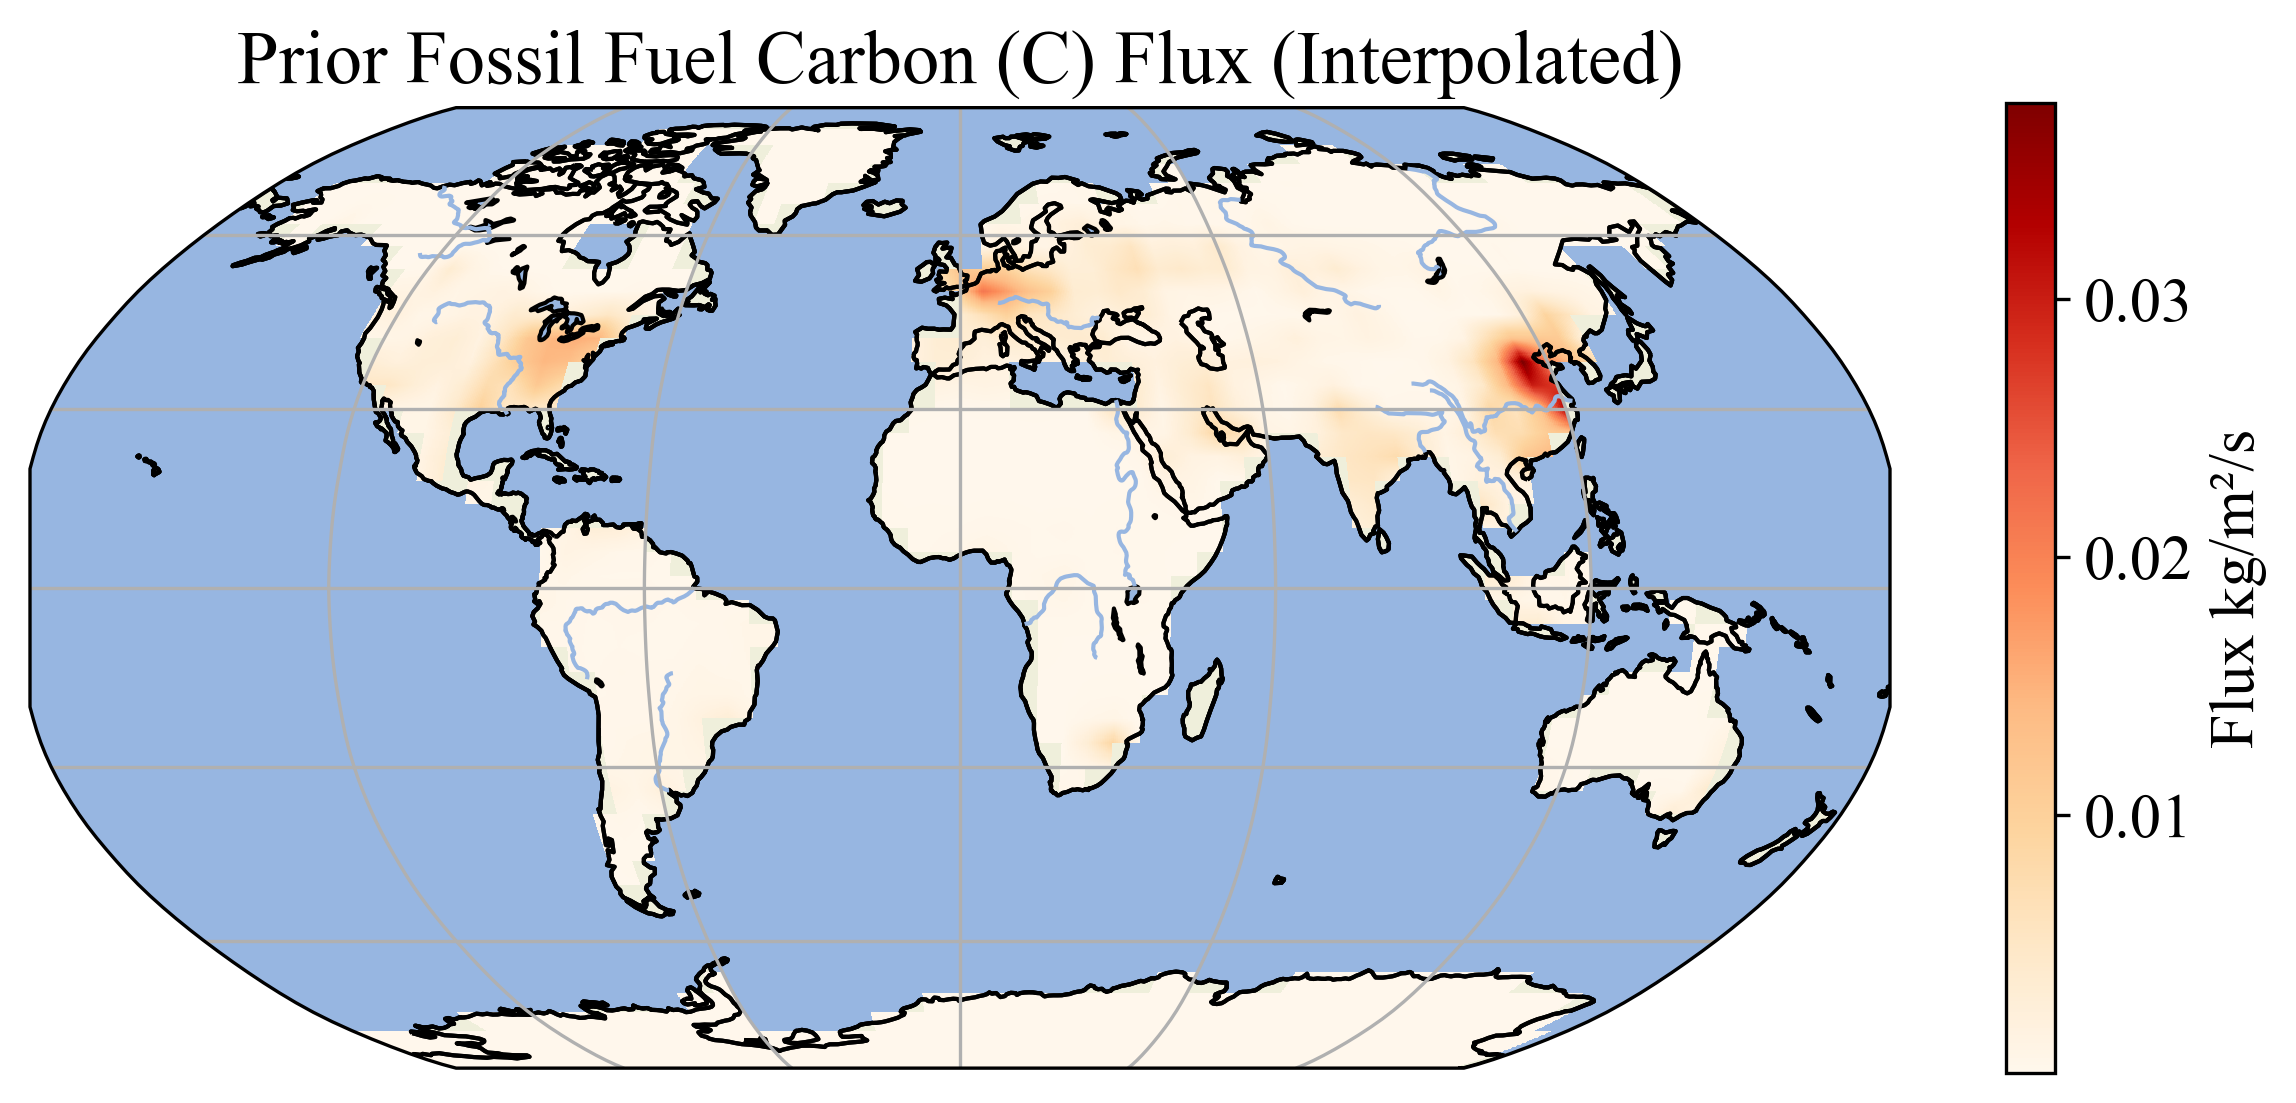

In [2]:
import xarray as xr
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # 导入cartopy库
# Load the dataset
import cartopy
import cartopy.feature as cfeature

filepaths = [
    'data/CMS_Flux_FossilFuelPrior_2010_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2011_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2012_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2013_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2014_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2015_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2016_v2.nc'
]

datasets = []


for file_path in filepaths:
    if os.path.exists(file_path):
        datasets.append(xr.open_dataset(file_path,decode_times=False))
    else:
        print(f"File {file_path} does not exist.")


ds_combined = xr.concat(datasets, dim='time')

flusx=ds_combined['flux'].mean(dim='time')
flusx_interp = flusx.interp(lon=np.linspace(flusx['lon'].min(), flusx['lon'].max(), 1000),
                            lat=np.linspace(flusx['lat'].min(), flusx['lat'].max(), 1000))

# 绘制插值后的图像
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution='110m')
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()
sc = ax.pcolormesh(flusx_interp['lon'], flusx_interp['lat'], flusx_interp, cmap='OrRd', transform=ccrs.PlateCarree())
cbar = fig.colorbar(sc, ax=ax, shrink=0.7, label='Flux kg/m²/s')
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.set_title('Prior Fossil Fuel Carbon (C) Flux (Interpolated)')
plt.savefig('Prior Fossil Fuel Carbon (C) Flux (Interpolated).png')
plt.show()


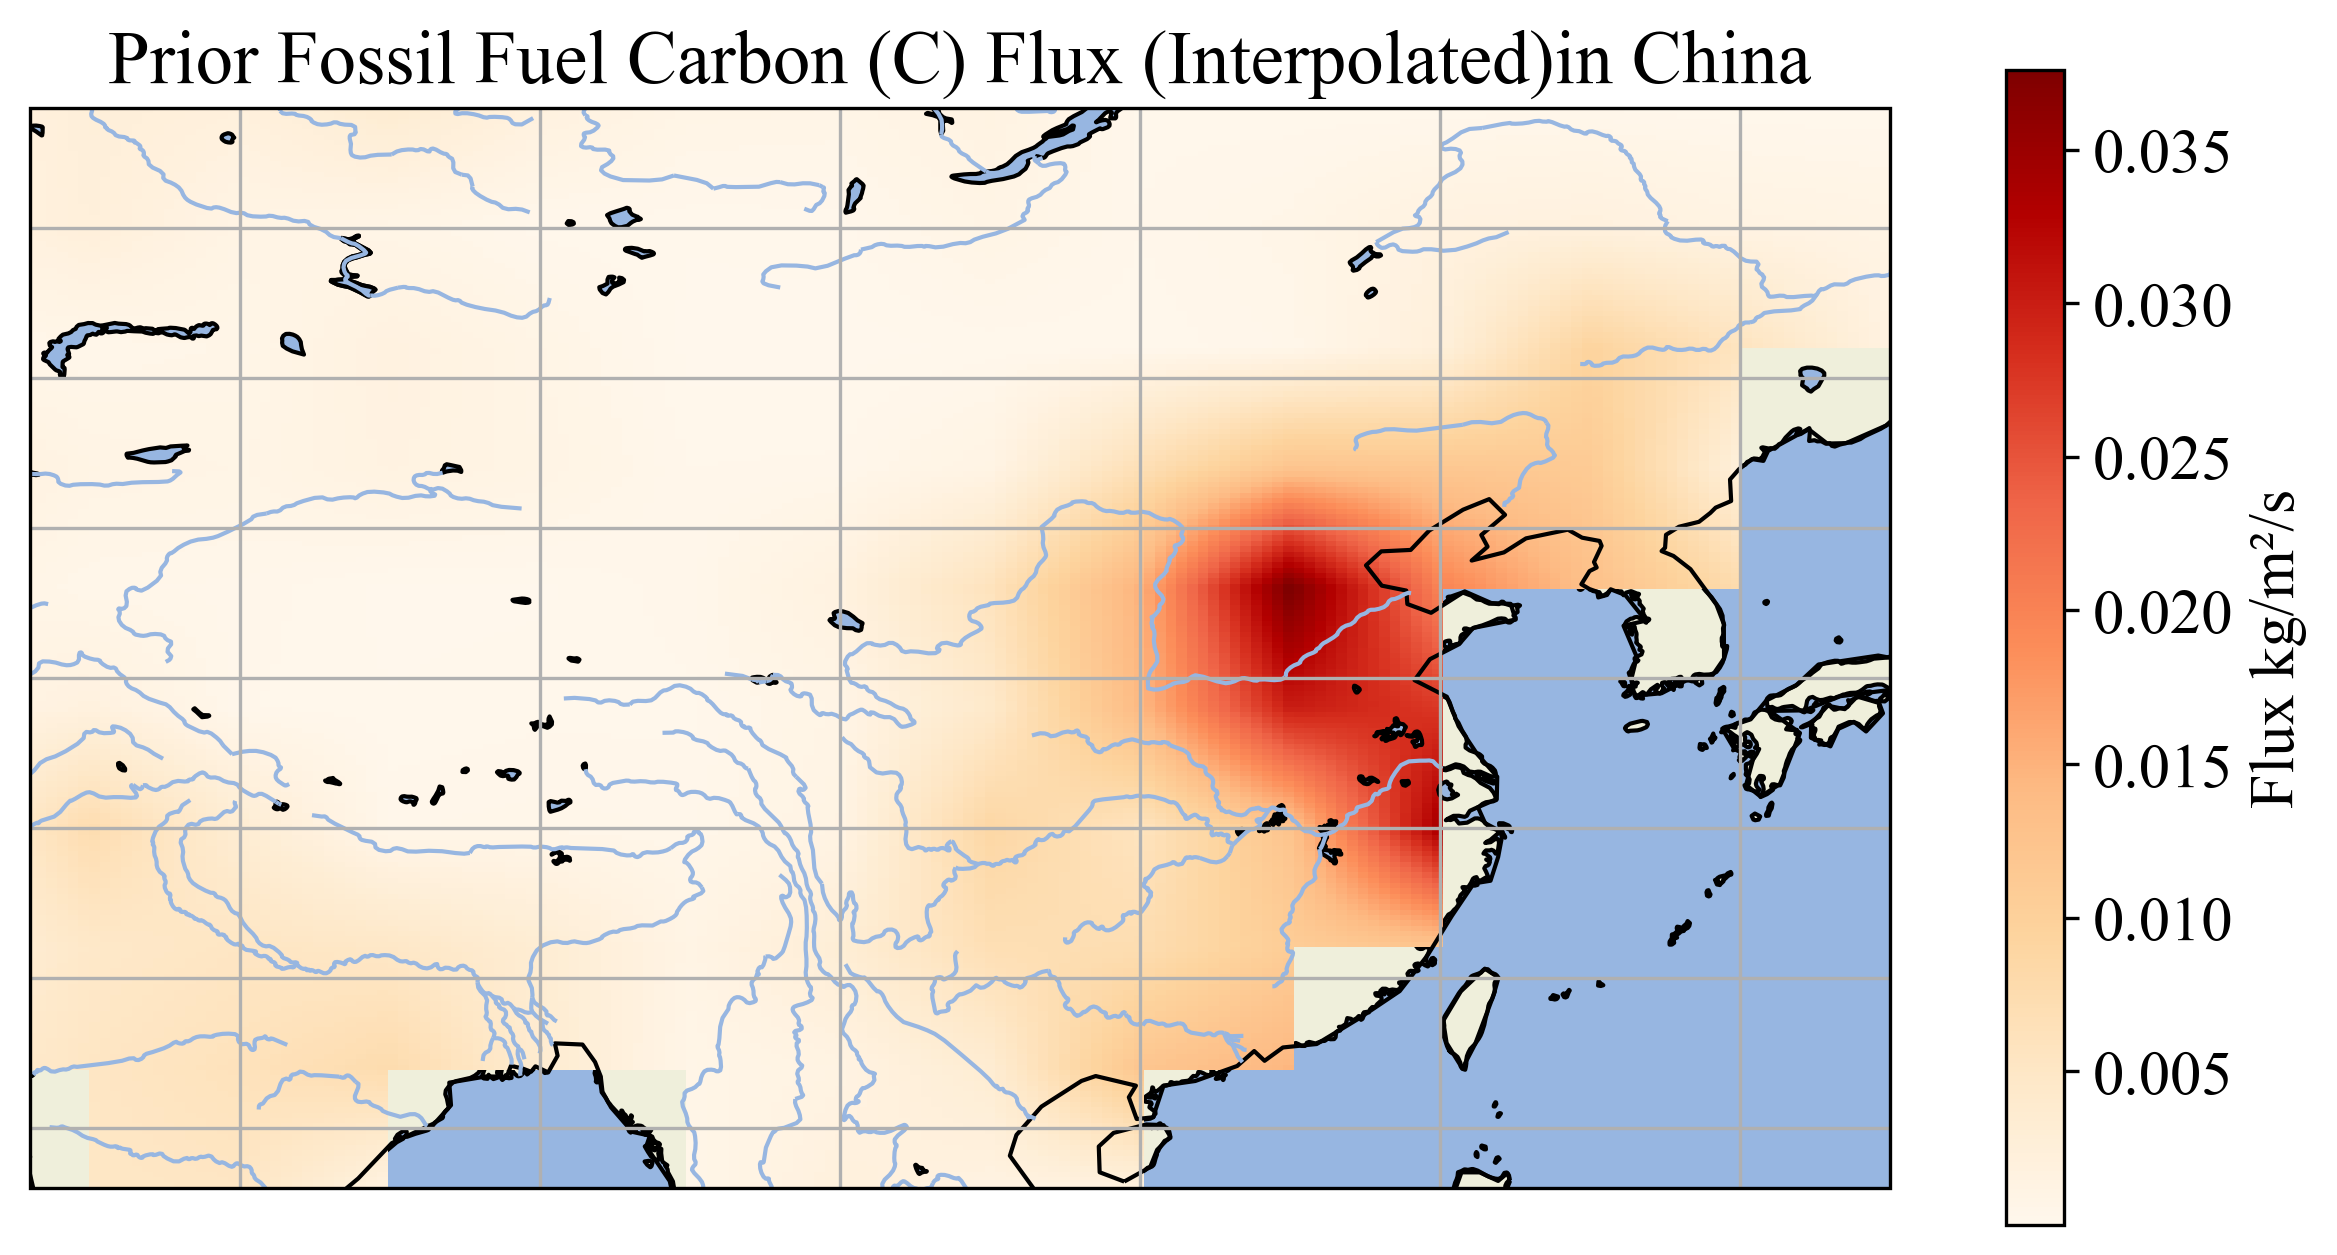

In [3]:
import xarray as xr
import numpy as np
import xarray as xr
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # 导入cartopy库
# Load the dataset
import cartopy
import cartopy.feature as cfeature
filepaths = [
    'data/CMS_Flux_FossilFuelPrior_2010_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2011_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2012_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2013_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2014_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2015_v2.nc',
    'data/CMS_Flux_FossilFuelPrior_2016_v2.nc'
]

datasets = []


for file_path in filepaths:
    if os.path.exists(file_path):
        datasets.append(xr.open_dataset(file_path,decode_times=False))
    else:
        print(f"File {file_path} does not exist.")


ds_combined = xr.concat(datasets, dim='time')

flusx=ds_combined['flux'].mean(dim='time')

flusx_interp = flusx.interp(lon=np.linspace(flusx['lon'].min(), flusx['lon'].max(), 1000),
                            lat=np.linspace(flusx['lat'].min(), flusx['lat'].max(), 1000))

# 绘制插值后的图像
fig = plt.figure(figsize=(10, 10), dpi=300)
# ax = plt.axes(projection=ccrs.Robinson())
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()
sc = ax.pcolormesh(flusx_interp['lon'], flusx_interp['lat'], flusx_interp, cmap='OrRd', transform=ccrs.PlateCarree())

cbar = fig.colorbar(sc, ax=ax, shrink=0.5, label='Flux kg/m²/s')
ax.set_extent([73, 135, 18, 54], crs=ccrs.PlateCarree())
ax.set_title('Prior Fossil Fuel Carbon (C) Flux (Interpolated)in China')
plt.savefig('Prior Fossil Fuel Carbon (C) Flux (Interpolated)in China.png')
plt.show()

In [61]:
ds_combined

<xarray.Dataset>
Dimensions:           (time: 84, lat: 46, lon: 72)
Coordinates:
  * lat               (lat) float64 -89.0 -86.0 -82.0 -78.0 ... 82.0 86.0 89.0
  * lon               (lon) float64 -180.0 -175.0 -170.0 ... 165.0 170.0 175.0
  * time              (time) float32 0.0 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0 11.0
Data variables:
    area              (time, lat, lon) float32 2.07e+03 2.07e+03 ... 2.07e+03
    flux              (time, lat, lon) float64 3.907e-07 3.939e-07 ... nan nan
    seconds_in_month  (time) float32 2.63e+06 2.63e+06 ... 2.63e+06 2.63e+06
Attributes: (12/26)
    Format:                         NetCDF-4
    Conventions:                    CF-1.7
    ProductionDateTime:             2020-08-21T19:03:59Z
    RangeBeginningDate:             2010-01-01
    RangeBeginningTime:             00:00:00.0
    RangeEndingDate:                2011-01-01
    ...                             ...
    format:                         netCDF
    SouthernmostLatitude:           -90.0
    WesternmostLongitude:           -180.0
    EasternmostLongitude:           180.0
    NorthnmostLatitude:             90.0
    history:                        V2 produced 9/2019